In [1]:
import graphviz
import json
import numpy as np
import re
%matplotlib inline

In [2]:
ontology_file = '/Users/athair/Git/lightserv_dj_demo/lightserv/data/allen_ontology.json'
with open(ontology_file) as json_file:
    ontology_dict = json.load(json_file)
    
test_ontology_file = '/Users/athair/Git/lightserv_dj_demo/lightserv/data/test_ontology.json'
with open(test_ontology_file) as json_file:
    test_ontology_dict = json.load(json_file)

In [79]:
def test_expand_graph(dic=test_ontology_dict,graph=my_test_graph,input_nodename=None):
    """ 
    ---PURPOSE---
    Take an existing graph and add to it the children 
    of an input_nodename. Recursive function.
    ---INPUT---
    dic             Dictionary representing the entire ontology graph (with "rank" key included)
    graph           The graphviz graph object that will be updated.
                    graph may be a subgraph of the entire graph as long as 
                    input_nodename is a node name in it
    input_nodename  The name of the node whose children you want to display
    """
    name = dic.get('name')
#     print(name)
    children = dic.get('children')
    if input_nodename == None: # default is root
        graph.node('root')
        return graph
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            graph.node(child_name)
            graph.edge(name,child_name)
        return graph
     
    for child in children:
        test_expand_graph(child,graph,input_nodename=input_nodename)
    return graph

In [99]:
def test_contract_graph(dic=test_ontology_dict,graph=my_test_graph,input_nodename=None):
    """ 
    ---PURPOSE---
    Take an existing graph and remove all descendents
    of an input_nodename. Recursive function.
    ---INPUT---
    dic             Dictionary representing the entire ontology graph (with "rank" key included)
    graph           The graphviz graph object that will be updated.
                    graph may be a subgraph of the entire graph as long as 
                    input_nodename is a node name in it
    input_nodename  The name of the node whose descendents you want to remove
    """
    name = dic.get('name')
    name_label = f'"{name}"' if len(name.split())>1 else name
    children = dic.get('children')
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            child_label = f'"{child_name}"' if len(child_name.split())>1 else child_name

            edge_str = f'\t{name_label} -> {child_label}' 
#             print(edge_st/r)
            # delete edges to children and children themselves
            child_str = f'\t{child_label}'

            del graph.body[graph.body.index(edge_str)]
            del graph.body[graph.body.index(child_str)]
            print("deleted %s" % child_str)
            print("deleting %s" % edge_str)
            test_contract_graph(child,graph,input_nodename=child_name)
    for child in children:
        test_contract_graph(child,graph,input_nodename=input_nodename)
    return graph

['\troot', '\t"Basic cell groups and regions"', '\troot -> "Basic cell groups and regions"', '\tCerebrum', '\troot -> Cerebrum']


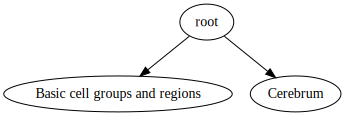

In [125]:
my_test_graph = graphviz.Digraph(strict=True)
# my_test_graph.attr('node',shape='box')
graph=test_expand_graph(graph=my_test_graph)
graph=test_expand_graph(graph=graph,input_nodename='root')
# graph=test_expand_graph(graph=graph,input_nodename='Cerebrum')
# graph = test_contract_graph(graph=graph,input_nodename='root')
print(graph.body)
# graph=test_contract_graph(graph=graph,input_nodename='Cerebrum')
graph

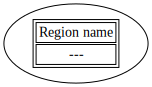

In [127]:
G = graphviz.Digraph()
G.node('root',label='''<<TABLE>
    <TR>
        <TD href='expand_route'>Region name</TD>
    </TR>
    <TR>
        <TD href='collapse route'>---</TD>
    </TR>
    </TABLE>>''')
G

in label of node root


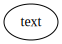

In [124]:
G = graphviz.Digraph()
G.node('root',label='''<<FONT href='http://www.google.com'>text</FONT>>''')
G

In [213]:
def expand_graph(dic=ontology_dict,graph=my_graph,input_nodename='root'):
    """ 
    ---PURPOSE---
    Take an existing graph and add to it the children 
    of an input_nodename. Recursive function.
    ---INPUT---
    dic             Dictionary representing the entire ontology graph (with "rank" key included)
    graph           The graphviz graph object that will be updated.
                    graph may be a subgraph of the entire graph as long as 
                    input_nodename is a node name in it
    input_nodename  The name of the node whose children you want to display
    """
    name = dic.get('name')
    children = dic.get('children')
    if input_nodename == None and root_body_str not in graph.body: # second check is so that I don't keep remaking the root node
#         print("here")
        href_expand = '/interactive_ontology?input_nodename=root'
        href_contract = '/interactive_ontology?input_nodename=root&amp;contract=True'
        graph.node('root',label='''<<TABLE border="0"><TR><TD href="{}">root</TD><TD BORDER="2" href="{}">-</TD></TR></TABLE>>'''.format(href_expand,href_contract))
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            href_expand = '/interactive_ontology?input_nodename={}'.format(child_name)
            href_contract = '/interactive_ontology?input_nodename={}&amp;contract=True'.format(child_name)
            graph.node(child_name,label='''<<TABLE><TR><TD href="{0}">{1}</TD><TD href="{2}">-</TD></TR></TABLE>>'''\
                       .format(href_expand,child_name,href_contract))
            graph.edge(name,child_name)
        return graph
     
    for child in children:
        expand_graph(child,graph,input_nodename=input_nodename)
    return graph

In [214]:
root_body_str = '\troot [label=<<TABLE><TR><TD href="/interactive_ontology?input_nodename=root">root</TD><TD href="/interactive_ontology?input_nodename=root&amp;contract=True">-</TD></TR></TABLE>>]'

my_graph = graphviz.Digraph(strict=True)
my_graph = expand_graph(dic=ontology_dict,graph=my_graph,input_nodename=None)
# my_graph = expand_graph(dic=ontology_dict,graph=my_graph,input_nodename='root')
# my_graph = expand_graph(dic=ontology_dict,graph=my_graph,input_nodename='')
# my_graph = contract_graph(dic=ontology_dict,graph=my_graph,input_nodename='root')

my_graph


In [195]:
def contract_graph(dic=ontology_dict,graph=my_graph,input_nodename='root'):
    """ 
    ---PURPOSE---
    Take an existing graph and remove all descendents
    of an input_nodename. Recursive function.
    ---INPUT---
    dic             Dictionary representing the entire ontology graph (with "rank" key included)
    graph           The graphviz graph object that will be updated.
                    graph may be a subgraph of the entire graph as long as 
                    input_nodename is a node name in it
    input_nodename  The name of the node whose descendents you want to remove
    """
    name = dic.get('name')
    name_label = f'"{name}"' if len(name.split())>1 else name
    children = dic.get('children')
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            child_label = f'"{child_name}"' if len(child_name.split())>1 else child_name
            edge_str = f'\t{name_label} -> {child_label}' 
#             print(edge_st/r)
            child_body_str = '\t{0} [label=<<TABLE><TR><TD href="/interactive_ontology?input_nodename={1}">{1}</TD>\
<TD href="/interactive_ontology?input_nodename={1}&amp;contract=True">-</TD></TR></TABLE>>]'.format(child_label,child_name)


            # delete edges to children and children themselves
#             child_body_str = f'''\t{child_label}'
#             '''<<TABLE><TR><TD href="{}">root</TD><TD href="{}">-</TD></TR></TABLE>>'''
            if edge_str in graph.body:
                del graph.body[graph.body.index(edge_str)]
                del graph.body[graph.body.index(child_body_str)]
                contract_graph(child,graph,input_nodename=child_name)
    for child in children:
        contract_graph(child,graph,input_nodename=input_nodename)
    return graph

In [194]:
my_graph.body

['\troot [label=<<TABLE><TR><TD href="/interactive_ontology?input_nodename=root">root</TD><TD href="/interactive_ontology?input_nodename=root&amp;contract=True">-</TD></TR></TABLE>>]',
 '\t"Basic cell groups and regions" [label=<<TABLE><TR><TD href="/interactive_ontology?input_nodename=Basic cell groups and regions">Basic cell groups and regions</TD><TD href="/interactive_ontology?input_nodename=Basic cell groups and regions&amp;contract=True">-</TD></TR></TABLE>>]',
 '\t"fiber tracts" [label=<<TABLE><TR><TD href="/interactive_ontology?input_nodename=fiber tracts">fiber tracts</TD><TD href="/interactive_ontology?input_nodename=fiber tracts&amp;contract=True">-</TD></TR></TABLE>>]',
 '\troot -> "fiber tracts"',
 '\t"ventricular systems" [label=<<TABLE><TR><TD href="/interactive_ontology?input_nodename=ventricular systems">ventricular systems</TD><TD href="/interactive_ontology?input_nodename=ventricular systems&amp;contract=True">-</TD></TR></TABLE>>]',
 '\troot -> "ventricular systems"

In [218]:
my_str = "{a} is a test string. {b} is a {a} string".format(a="test",b="this")
my_str

'test is a test string. this is a test string'

In [221]:
my_str = "{0} is a test string. {1} is a {0} string".format("test","this")
my_str

'test is a test string. this is a test string'

## Making an annotation volume from a graph
The challenge here is to use a custom graph, i.e. the end result from someone browsing the interactive ontology, to make a custom annotation volume (16-bit).

As I found from making the annotation volumes of a fixed rank, the process can take quite a while if I need to make a lot of reassignments. I may be able to make use of these fixed rank annotation volumes to speed up the process by first figuring out what the highest ranked node in the graph is, then using the pre-computed annotation volume of that rank. 

Let's first try it in its simplest form: write a function which takes in a graph in a particular state and take the annotation volume downloaded from Allen website as is and make it into an annotation volume that reflects the state of the graph.

First, I need to make a dictionary where the keys are the highest ranked ids in each branch and the values are lists of descendent ids (in the ontology dictionary). 

In [ ]:
def make_collapse_list(dic,graph):
    """ 
    ---PURPOSE---
    Traverse a graph and make a list of the descendents of each of the graph's highest ranked entries in each branch
    ---INPUT---
    dic             Dictionary representing the entire ontology graph (with "rank" key included)
    graph           The graphviz graph object that contains the 
                    state of the graph
    """
    name = dic.get('name')
    children = dic.get('children')
    if input_nodename == None and root_body_str not in graph.body: # second check is so that I don't keep remaking the root node
#         print("here")
        href_expand = '/interactive_ontology?input_nodename=root'
        href_contract = '/interactive_ontology?input_nodename=root&amp;contract=True'
        graph.node('root',label='''<<TABLE border="0"><TR><TD href="{}">root</TD><TD BORDER="2" href="{}">-</TD></TR></TABLE>>'''.format(href_expand,href_contract))
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            href_expand = '/interactive_ontology?input_nodename={}'.format(child_name)
            href_contract = '/interactive_ontology?input_nodename={}&amp;contract=True'.format(child_name)
            graph.node(child_name,label='''<<TABLE><TR><TD href="{0}">{1}</TD><TD href="{2}">-</TD></TR></TABLE>>'''\
                       .format(href_expand,child_name,href_contract))
            graph.edge(name,child_name)
        return graph
     
    for child in children:
        expand_graph(child,graph,input_nodename=input_nodename)
    return graph

In [ ]:
def make_custom_annotation_volume(dic,vol,graph):
    """ 
    ---PURPOSE---
    Take an existing annotation volume and collapse it to the 
    state of a graph provided.
    ---INPUT---
    dic             Dictionary representing the entire ontology graph (with "rank" key included)
    vol             The annotation volume you want to update
    graph           The graphviz graph object that contains the 
                    state of the graph that you want reflected in the 
                    output annotation volume
    """
    name = dic.get('name')
    children = dic.get('children')
    if input_nodename == None and root_body_str not in graph.body: # second check is so that I don't keep remaking the root node
#         print("here")
        href_expand = '/interactive_ontology?input_nodename=root'
        href_contract = '/interactive_ontology?input_nodename=root&amp;contract=True'
        graph.node('root',label='''<<TABLE border="0"><TR><TD href="{}">root</TD><TD BORDER="2" href="{}">-</TD></TR></TABLE>>'''.format(href_expand,href_contract))
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            href_expand = '/interactive_ontology?input_nodename={}'.format(child_name)
            href_contract = '/interactive_ontology?input_nodename={}&amp;contract=True'.format(child_name)
            graph.node(child_name,label='''<<TABLE><TR><TD href="{0}">{1}</TD><TD href="{2}">-</TD></TR></TABLE>>'''\
                       .format(href_expand,child_name,href_contract))
            graph.edge(name,child_name)
        return graph
     
    for child in children:
        expand_graph(child,graph,input_nodename=input_nodename)
    return graph